In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
def load_fertilizer_data(csv_path):
    df = pd.read_csv(csv_path)

    # Encode categorical columns
    cat_cols = ['Soil_Type', 'Crop_Type']
    encoders = {}

    for col in cat_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[col] = le

    X = df.drop(columns=['Fertilizer'])
    y = df['Fertilizer']

    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

    return X_train, X_test, y_train, y_test, label_encoder, len(label_encoder.classes_)

In [60]:
def train_tree(X_train, X_test, y_train, y_test):
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    return model, acc, "decision_tree_fertilizer.joblib"

In [61]:
def train_rf(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=200, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    return model, acc, "random_forest_fertilizer.joblib"

In [62]:
def train_xgb(X_train, X_test, y_train, y_test):
    model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    return model, acc, "xgboost_fertilizer.joblib"

In [ ]:
def compare_and_save_best_fertilizer_model(csv_path):
    X_train, X_test, y_train, y_test, encoder, n_classes = load_fertilizer_data(csv_path)

    results = []
    results.append(train_tree(X_train, X_test, y_train, y_test))
    results.append(train_rf(X_train, X_test, y_train, y_test))
    results.append(train_xgb(X_train, X_test, y_train, y_test))

    best_model, best_acc, best_name = max(results, key=lambda x: x[1])

    joblib.dump(best_model, "D:/WebProject/v3Project/Farming Solution/backend\models/fertilizer_recommendation.joblib")
    joblib.dump(encoder, "D:/WebProject/v3Project/Farming Solution/backend\models/label_encoder_fertilizer.joblib")
    print(f"\nBest model: {best_name} with accuracy: {best_acc:.4f}")

    # Plot
    names = [name.replace("_fertilizer.joblib", "").replace("_", " ").title() for _, _, name in results]
    accs = [acc for _, acc, _ in results]

    plt.figure(figsize=(10, 5))
    bars = plt.barh(names, accs, color='coral')
    plt.xlabel("Accuracy")
    plt.title("Fertilizer Prediction Model Accuracy Comparison")
    plt.xlim(0, 1)

    for bar, acc in zip(bars, accs):
        plt.text(acc + 0.01, bar.get_y() + bar.get_height() / 2, f"{acc:.2f}", va='center')

    plt.tight_layout()
    plt.show()

    return best_name, best_acc


<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
C:\Users\SRIRAM\AppData\Local\Temp\ipykernel_15652\2621395218.py:14: SyntaxWarning: invalid escape sequence '\m'
  joblib.dump(best_model, "D:/WebProject/v3Project/Farming Solution/backend\models/fertilizer_recommendation.joblib")
C:\Users\SRIRAM\AppData\Local\Temp\ipykernel_15652\2621395218.py:15: SyntaxWarning: invalid escape sequence '\m'
  joblib.dump(encoder, "D:/WebProject/v3Project/Farming Solution/backend\models/label_encoder_fertilizer.joblib")


c:\Users\SRIRAM\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:06:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best model: decision_tree_fertilizer.joblib with accuracy: 0.9767


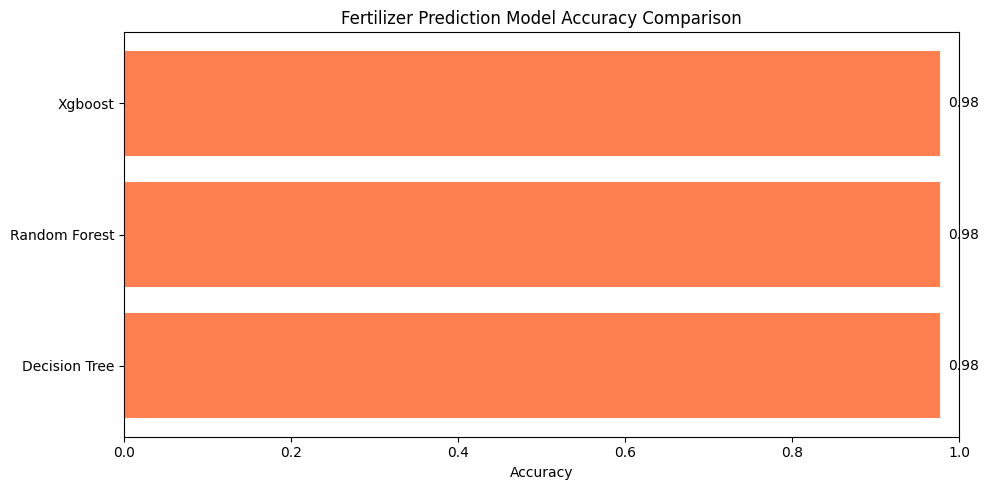

('decision_tree_fertilizer.joblib', 0.9767441860465116)

In [64]:
compare_and_save_best_fertilizer_model("D:/WebProject/v3Project/Farming Solution/Fertilizer Prediction.csv")